Importing libraries

NumPy: utilized for high-performance vector arithmetic.

Pandas: utilized for dataset management and cleaning.

Matplotlib: utilized for generating graphical visualizations.

Perceptron: a simplt custom built class implementation for the perceptron logic.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)
from src.perceptron import Perceptron

For the introduction, I chose a simple dataset suitable for a classification. \
The Iris Species dataset fits these criteria well and is perfect for demonstrating the basics.

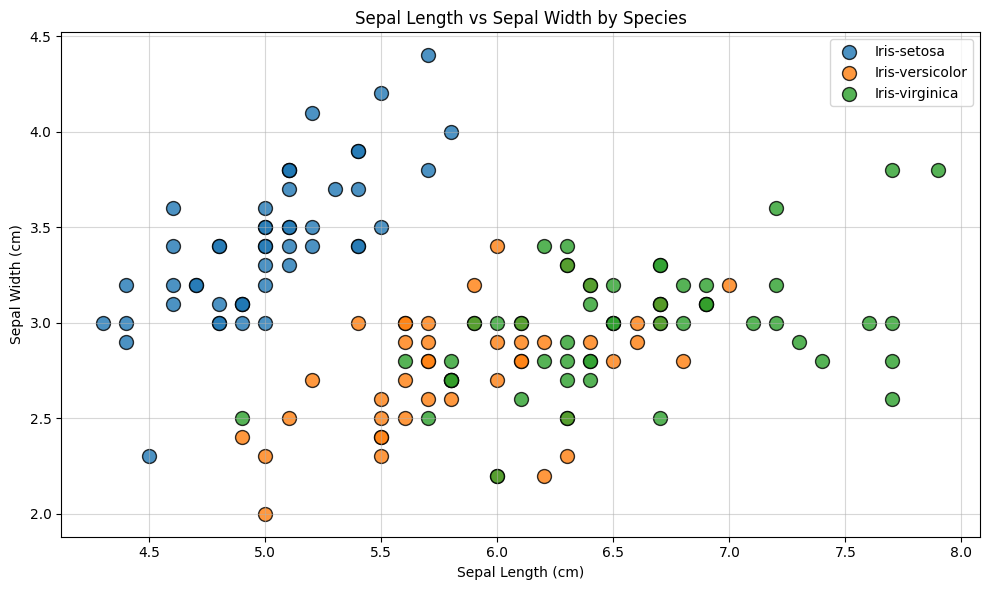

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
# --- 1. Load Data ---
FILE_PATH = '../datasets/iris_species.csv'

try:
    df = pd.read_csv(FILE_PATH)
except FileNotFoundError:
    print(f"Error: The file at {FILE_PATH} was not found.")
    exit()

# --- 2. Data Cleaning ---
# no need to clean as the dataset is already clean


# --- 3. Visualization ---
plt.figure(figsize=(10, 6))


for i, (name, group) in enumerate(df.groupby('Species')):
    plt.scatter(
        x=group['SepalLengthCm'],
        y=group['SepalWidthCm'],
        label=name,
        edgecolors='black',
        alpha=0.8,
        s=100
    )

plt.title("Sepal Length vs Sepal Width by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

df

Training on 80 samples
Testing on 20 samples

--- Testing Results ---
Accuracy: 100.00%


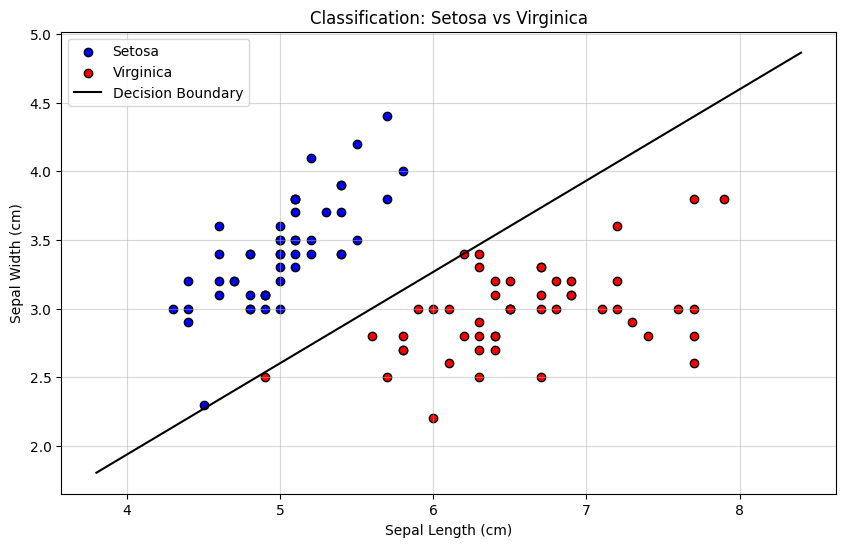

In [ ]:
# --- 1. Select Features & Target ---
df_binary = df[df['Species'].isin(['Iris-setosa', 'Iris-virginica'])]

# Using only two features for the classification so we can later on visualize the decision boundary in a 2D plot. 
X = df_binary[['SepalLengthCm', 'SepalWidthCm']].values
y = np.where(df_binary['Species'] == 'Iris-setosa', 1, -1) # Some perceptrons use 1 and -1, others use 1 and 0


# --- 2. Split Data for training & testing ---
np.random.seed()
shuffled_indices = np.random.permutation(len(X))
split_point = int(len(X) * 0.8)

train_indices = shuffled_indices[:split_point]
test_indices = shuffled_indices[split_point:]

X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]


# --- 3. Training ---
print(f"Training on {len(X_train)} samples")

model = Perceptron()
model.fit(X_train, y_train, n_epochs=500, show_progress=False, learning_rate=0.01)


# --- 4. Evaluation ---
print(f"Testing on {len(X_test)} samples")

print("\n--- Testing Results ---")
predictions = model.predict(X_test)

accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


# --- 5. Visualization ---
plt.figure(figsize=(10, 6))

plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Setosa', edgecolors='black')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='red', label='Virginica', edgecolors='black')


x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x_vals = np.array([x_min, x_max])
w = model.weights

y_vals = -(w[0] * x_vals + w[2]) / w[1]

plt.plot(x_vals, y_vals, 'black', label='Decision Boundary')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Classification: Setosa vs Virginica')
plt.grid(True, alpha=0.5)
plt.legend()
plt.show()